In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(8103, 28)
(8103, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_acc[:, 22] == 1)[0]
X_relative_footsteps_acc_FR_swinging = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FR_swinging = Y_relative_footsteps_acc[idxs]

## Predict FR foot -> x

In [8]:
X_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.0291372 ,  0.14719469,
        0.02297609,  0.00390969,  0.00879887, -0.0143033 ,  0.22920228,
        0.1869078 , -0.40553803,  0.22966338, -0.20612911, -0.40550052,
       -0.26193804,  0.13096712, -0.40069671, -0.25670755, -0.15245044,
       -0.4004477 ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.1       ])

In [9]:
Y_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.23097709,  0.20958901,  0.22783941, -0.18877447, -0.25504919,
        0.15667753, -0.26330079, -0.12892046])

### Linear Regression

In [11]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9541997662344982
RMSE:  0.00601543173205174
The lowest error is:  8.057567636610141e-06
The highest error is:  0.040603137347563045
The avg. error is:  0.003221051139120912


In [12]:
model_fr_relative_swinging_x.coef_

array([[-1.77342890e-02, -1.92437863e-02,  2.00825409e-02,
         1.04301690e-01, -9.75592780e-05,  2.86956911e-02,
        -1.00947419e-01,  1.03526252e-01,  6.05666259e-01,
         4.86980835e-03, -2.37079592e-01,  1.02157475e-01,
         3.79220580e-01,  9.30513629e-02]])

In [13]:
model_fr_relative_swinging_x.intercept_

array([0.13037527])

Text(0, 0.5, 'Predictions')

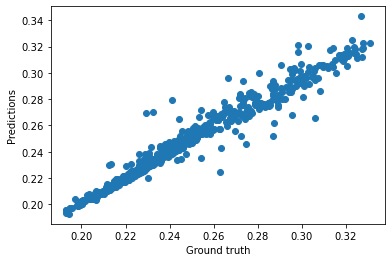

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_fr_relative_swinging_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FL foot -> y

In [23]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9414675939678575
RMSE:  0.005455472087764246
The lowest error is:  2.0156261465453795e-08
The highest error is:  0.039599077604219546
The avg. error is:  0.0029111789125210595


In [24]:
model_fr_relative_swinging_y.coef_

array([[-7.50068422e-03, -5.28136542e-03, -6.85038858e-03,
        -2.50730732e-04,  1.05725009e-01,  4.03727461e-02,
        -6.62385974e-02,  2.41906600e-01, -6.84962908e-02,
         5.37589922e-01,  6.98159712e-02, -4.45746470e-02,
         1.31804812e-01, -5.36881644e-02]])

In [25]:
model_fr_relative_swinging_y.intercept_

array([-0.04072177])

Text(0, 0.5, 'Predictions')

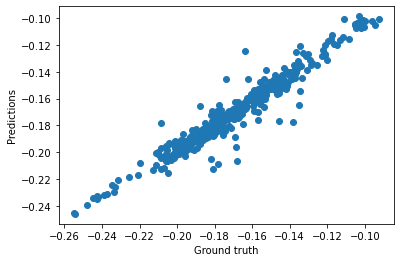

In [26]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [35]:
#%store model_fr_relative_swinging_y

In [36]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [37]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")